In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_l_bfgs_b
from scipy.optimize import brentq

In [2]:
N=50
true_tau = 1.
np.random.seed(4)
data=np.random.exponential(scale=true_tau, size=N )

In [3]:
data

array([3.41215234, 0.79237598, 3.60029585, 1.25462067, 1.19643073,
       0.24346042, 3.74120295, 0.00624974, 0.29166648, 0.57056065,
       1.51132676, 0.22025407, 1.98772498, 4.09839338, 0.17893798,
       0.90964771, 0.00902672, 0.48869121, 0.0451648 , 3.13851704,
       0.57296107, 2.97548478, 1.54321013, 2.01207676, 0.19015063,
       0.07790596, 0.91814926, 0.18388941, 1.32193148, 0.52499869,
       0.75058314, 2.77373472, 0.73750902, 0.11450597, 0.17224063,
       0.78790335, 0.74318669, 1.01503497, 0.51332114, 1.04926545,
       0.50567226, 0.97794306, 1.45845639, 0.19720039, 0.47092528,
       0.69822618, 1.16048901, 0.29260035, 0.80909884, 0.98064485])

In [4]:
def nlogL_exp(tau):
    # loglikelihood for data following exponential distribution
    term1 = len(data)*np.log(1/tau)
    term2 = -(1/tau)*np.sum(data)
    return -term1 - term2

In [7]:
# determine the tau_MLE
tau_guess = 0.1 #np.mean(data)
tau_opt, fmin, etc = fmin_l_bfgs_b(nlogL_exp, tau_guess, approx_grad=True)
tau_opt = tau_opt[0]
fmin = fmin[0]
print(tau_guess, tau_opt, fmin)

0.1 1.0845200159210648 54.056874932224815


In [8]:
# determine solution of tau_opt^{+d}_{-c} = logLmax - 1/2, brentq method (variant of secant method. Need two values with sign change)
ap = 0.1
bp= 2.0
am = 0.1
bm = 0.5
print(-nlogL_exp(tau_opt+ap)+nlogL_exp(tau_opt)+1/2, -nlogL_exp(tau_opt+bp)+nlogL_exp(tau_opt)+1/2)
print(-nlogL_exp(tau_opt-am)+nlogL_exp(tau_opt)+1/2, -nlogL_exp(tau_opt-bm)+nlogL_exp(tau_opt)+1/2)

0.31111224892487144 -19.34297289118281
0.2583110124690222 -11.365046556987991


In [9]:
def func_plus(x):
  return -nlogL_exp(tau_opt+x)+nlogL_exp(tau_opt)+1/2
def func_minus(x):
  return -nlogL_exp(tau_opt-x)+nlogL_exp(tau_opt)+1/2 

d = brentq(func_plus,ap,bp) 
c = brentq(func_minus,am,bm)

print(d,c)

0.16902086275318154 0.1399520394103082


In [10]:
tau_arr=np.linspace(0.8, 1.6, 100)
logL_arr=[]
for tau in tau_arr:
  logL_arr.append(-nlogL_exp(tau))

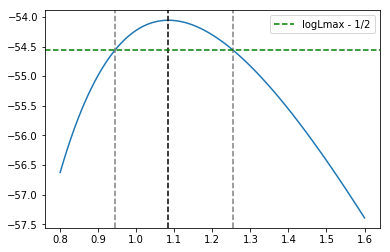

In [11]:
plt.plot(tau_arr, logL_arr)
plt.axvline(x=tau_opt, ls='--',color='black')
plt.axvline(x=tau_opt+d, ls='--',color='gray')
plt.axvline(x=tau_opt-c, ls='--',color='gray')
plt.axhline(y=-nlogL_exp(tau_opt)-0.5,color='green',ls='--',label='logLmax - 1/2')
plt.legend()
plt.show()

In [12]:
# do it for a specified CL:
N=1.960 # corresponds to CL= 95%, cf. table 9.2 of Cowan

ap = 0.1
bp= 2.0
am = 0.1
bm = 0.5
print(-nlogL_exp(tau_opt+ap)+nlogL_exp(tau_opt)+N**2/2, -nlogL_exp(tau_opt+bp)+nlogL_exp(tau_opt)+N**2/2)
print(-nlogL_exp(tau_opt-am)+nlogL_exp(tau_opt)+N**2/2, -nlogL_exp(tau_opt-bm)+nlogL_exp(tau_opt)+N**2/2)

1.7319122489248713 -17.92217289118281
1.679111012469022 -9.944246556987991


In [13]:
def func_plus(x):
  return -nlogL_exp(tau_opt+x)+nlogL_exp(tau_opt)+N**2/2
def func_minus(x):
  return -nlogL_exp(tau_opt-x)+nlogL_exp(tau_opt)+N**2/2 
d = brentq(func_plus,ap,bp) 
c = brentq(func_minus,am,bm)

print(d,c)

0.36573944455219254 0.25242874313660646
